# Исследование надежности заемщиков

Это первая часть проекта, она будет проверена автоматически. Вторую часть проверит ревьюер. 

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum(axis=0)

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
median_income = data.groupby('income_type')['total_income'].median()
rows_na = data['total_income'].isna()
data.loc[rows_na, "total_income"] = data.loc[rows_na, "income_type"].apply(
    lambda x: median_income[x]
)

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [12]:
median_days = data.groupby('income_type')['days_employed'].median()
rows_na = data['days_employed'].isna()

data.loc[rows_na, "days_employed"] = data.loc[rows_na, "income_type"].apply(
    lambda x: median_days[x]
)

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
# ваш код здесь
data["total_income"] = data['total_income'].astype("int")

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    if income > 1_000_000:
        label = "A"
    elif 200_000 < income <= 1_000_000:
        label ="B"
    elif 50_000 < income <= 200_000:
        label = "C"
    elif 30_000 < income <= 50_000:
        label = "D"
    else:
        label = "E"
    return label

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(purpose):
    if ("машин" in purpose) or ("авто" in purpose):
        label = 'операции с автомобилем'
    elif ("жил" in purpose) or ("движим" in purpose) or ("дом" in purpose):
        label = 'операции с недвижимостью'
    elif ("свадь" in purpose):
        label = 'проведение свадьбы'
    elif ("образов" in purpose) or ("учеба" in purpose) or ("учёба" in purpose):
        label = 'получение образования'
    return label

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

В этой части задания вопросы однотипные: нужно узнать есть ли зависимость просрочки кредита от какого-то фактора. Поэтому напишем функцию, которая будет:
* группировать наши данные по вводимому признаку
* подсчитывать число просрочек
* подсчитывать общее число кредитов
* отношение числа просрочек к числу событий 
* переводить отношение в проценты для наглядности. 

Последние два параметра я решил ввести, чтобы оценивать существование зависимости по отношению, потому как в результате разбиений группы будут несбалансированные и голые цифры могут вводить в заблуждение

In [23]:
def create_group(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    grouped = df.groupby(feature)['debt'].agg(['sum', 'count'])
    grouped = grouped.reset_index()
    grouped = grouped.rename(
        columns={
            'sum': 'total_debt',
            'count': 'total_credit'
        }
    )
    grouped['ratio'] = grouped['total_debt'] / grouped['total_credit']
    grouped['percent'] = round(100 * grouped['ratio'], 3)
    return grouped

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для начала перегруппируем данные и посмотрим как выглядят общее количество выданных кредитов и количество просрочек для семей с разным количеством детей.

In [24]:
debt_from_childrens = create_group(data, 'children')

In [25]:
debt_from_childrens.head(6)

,children,total_debt,total_credit,ratio,percent
0,0,1063,14091,0.075438,7.544
1,1,444,4808,0.092346,9.235
2,2,194,2052,0.094542,9.454
3,3,27,330,0.081818,8.182
4,4,4,41,0.097561,9.756
5,5,0,9,0.000000,0.000


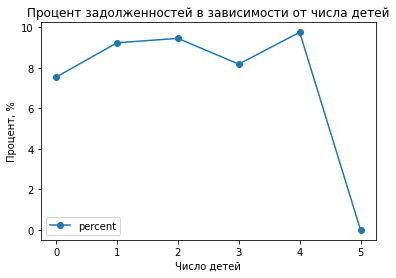

In [26]:
debt_from_childrens.plot(
    x='children', 
    y='percent', 
    marker='o',
    ylabel='Процент, %',
    xlabel='Число детей',
    title="Процент задолженностей в зависимости от числа детей"
);

Если данные для людей с пятью детьми убрать и не принимать во внимание, потому как в них слишком мало измерений и сомнительно, что они отражают реальную картину, то в целом процент задолженностей немного растет с количеством детей в семье.  

Точка для людей с тремя детьми немного выпадает, возможно из-за того, что попалась такая выборка и ее значение выровнялось бы при добавлении данных (на мой взгляд конечно).

__Вывод__: 
Процент задолженностей плавно (нелинейно) растет с увеличением числа детей в семье. Соответственно, чем больше детей в семье, тем вероятнее просрочка по кредиту. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?
Для того, чтобы ответить на этот вопрос сгруппируем данные по семейному положению

In [27]:
family = create_group(data, 'family_status')

In [28]:
family

,family_status,total_debt,total_credit,ratio,percent
0,Не женат / не замужем,273,2796,0.097639,9.764
1,в разводе,84,1189,0.070648,7.065
2,вдовец / вдова,63,951,0.066246,6.625
3,гражданский брак,385,4134,0.093130,9.313
4,женат / замужем,927,12261,0.075606,7.561


Судя по данным, получается, что люди, которые женаты/замужем или пережили брак (как бы это не звучало) заметно реже просрачивают выплаты по кредитам, нежели не женатые/не замужние или состоящие в гражданском браке.
 
Оценим на сколько процентов:

In [29]:
print(f"Средняя разница {0.5 * (9.8 + 9.3) - (6.6 + 7.6 + 7.1) / 3:.2f}")

Средняя разница 2.45


__Вывод__:
Да, зависимость есть. Не женатые / не замужние люди или же состоящие в гражданском браке в среднем на 2.45% случаев чаще имеют задолженности по кредитам.


Как мне кажется, это получается из-за того, что люди с семьями имеют на самом деле несколько больший бюджет, чем указано в таблице, так как их все-таки двое плюс, может быть, родственники. В случае со `вдовцами / вдовами`, наверное, также из-за родственников. У `не женатых / не замужних` только свой бюджет, а люди в `гражданском браке` мне представляются все-таки как два практически отдельных человека с раздельным бюджетом.


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Тут группировать будем по созданному нами ранее разделению на группы по зарплате

In [30]:
income = create_group(data, 'total_income_category')

In [31]:
income

,total_income_category,total_debt,total_credit,ratio,percent
0,A,2,25,0.080000,8.000
1,B,354,5014,0.070602,7.060
2,C,1353,15921,0.084982,8.498
3,D,21,349,0.060172,6.017
4,E,2,22,0.090909,9.091


Можно для наглядности добавить еще значения соответсвующие каждой группе. 

PS: _Их всего пять, поэтому можно расставить и руками_

In [32]:
income['total_income_category_digits'] = [
    '> 1_000_000', '200_000 : 1_000_000', '50_000 : 200_000', '30_000 : 50_000', '< 30_000'
]

In [33]:
income

,total_income_category,total_debt,total_credit,ratio,percent,total_income_category_digits
0,A,2,25,0.080000,8.000,> 1_000_000
1,B,354,5014,0.070602,7.060,200_000 : 1_000_000
2,C,1353,15921,0.084982,8.498,50_000 : 200_000
3,D,21,349,0.060172,6.017,30_000 : 50_000
4,E,2,22,0.090909,9.091,< 30_000


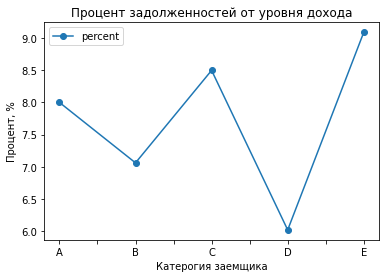

In [34]:
income.plot(
    x='total_income_category', 
    y='percent', 
    marker='o',
    ylabel='Процент, %',
    xlabel='Катерогия заемщика',
    title="Процент задолженностей от уровня дохода"
);

Здесь я не вижу зависимости между уровнем дохода и возвратом кредита в срок, что странно для меня. Даже если принять что для категорий `A` и `Е` данных мало и откинуть их, то явной зависимости не вырисовывается.

Возможно, если добавить еще размер кредита и(или) сколько в месяц вынужден выплачивать заемщик, то зависимость и появится

__Вывод__: Зависимости числа задолженностей от уровня дохода не выявлено

#### 3.4 Как разные цели кредита влияют на его возврат в срок?
В данном случае будем группировать по `purpose_category`

In [35]:
purpose = create_group(data, 'purpose_category')
purpose

,purpose_category,total_debt,total_credit,ratio,percent
0,операции с автомобилем,400,4279,0.093480,9.348
1,операции с недвижимостью,780,10751,0.072551,7.255
2,получение образования,369,3988,0.092528,9.253
3,проведение свадьбы,183,2313,0.079118,7.912


Если ввести дополнительный параметр, например, мера персональной ответсвенности. То 
я бы расставил эти категории в следующем порядке: `операции с недвижимостью > проведение свадьбы > получение образования > операции с автомобилем`. 

PS: Под мерой персональной ответственности я подразумеваю степень последствий, которые могут произойти, если не выполнить цель.

PSS: Может быть, это сильно притянуто или сформулированно не очень корректно, но я бы расставил именно так. 

__Вывод__: Чем более ответственная цель в плане последствий, тем меньше вероятность просрочки кредита.

### Ответ на комментарий
___

In [36]:
data.pivot_table(
    index='purpose_category', 
    values='debt', 
    aggfunc=['mean', lambda x: 100 * x.mean()]
)

,mean,<lambda>
,debt,debt
purpose_category,,
операции с автомобилем,0.093480,9.347978
операции с недвижимостью,0.072551,7.255139
получение образования,0.092528,9.252758
проведение свадьбы,0.079118,7.911803


Тут ничего нового не добавилось, если я правильно сгруппировал, поэтому вывод у меня не поменялся.

Метод `mean` в данном случае сработал как для посчета отношения из-за того, что признак `debt` единица, если была задержка по кредиту и ноль, если ее не было. Столбец с `<lambda>` это перевод в проценты (не нашел как на лету переименовывать столбцы)

___


Интересно получается, если добавить еще один признак для группировки, например, `education`.

Для начала, просто сгруппировав по уровню образования, получается, что чем он выше, тем задолженностей меньше


In [37]:
data.pivot_table(
    index='education',
    values='debt', 
    aggfunc=['count', 'sum', 'mean', lambda x: 100 * x.mean()]
)

,count,sum,mean,<lambda>
,debt,debt,debt,debt
education,,,,
высшее,5227,278,0.053185,5.318538
начальное,282,31,0.109929,10.992908
неоконченное высшее,741,68,0.091768,9.176788
среднее,15075,1355,0.089884,8.988391
ученая степень,6,0,0.000000,0.000000


Уберем категорию `ученая степень` случаев все-таки маловато на фоне остальных и будем смотреть не на доли, а на проценты и сгруппируем уже по двум признакам

In [38]:
data[data['education'] != 'ученая степень'].pivot_table(
    index='purpose_category', 
    columns='education',
    values='debt', 
    aggfunc=lambda x: 100 * x.mean(), 
)

education,высшее,начальное,неоконченное высшее,среднее
purpose_category,,,,
операции с автомобилем,6.485963,10.909091,10.457516,10.236998
операции с недвижимостью,4.836895,11.111111,8.994709,7.952891
получение образования,5.926724,9.090909,9.160305,10.337626
проведение свадьбы,4.507513,14.285714,7.594937,9.085252


Тут получается, что люди с разным уровнем образования более ответственно подходят к разным целям:
1. Высшее или неполное высшее - проведение свадьбы
2. Среднее - недвижимость
3. Начальное - получение образования

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.
__Ответ__:
1. Человеческий фактор (случайные)
    1. Опечатки
    2. Ошибки
2. Ошибки или неполнота в коде (неслучайные)
    1. Не сказано как обрабатывать какой-то случай
    2. Сбой в работе системы
    3. Вирусы)

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

__Ответ__: 
Медиана менее чувствительна к выбросам в отличие от среднего значения.

Рассмотрим массив 
```python
    array = [10, 10, 15, 25, 100000]
```
тогда 
* Среднее значение
 * От [10, 10, 15, 25] -> 15
 * От [10, 10, 15, 25, 100000] -> 20012
* Медиана 
 * От [10, 10, 15, 25] -> 12.5
 * От [10, 10, 15, 25, 100000] -> 15


### Шаг 4: общий вывод.
Данные из датасета `/datasets/data.csv` было необходимо проанализоровать на наличие зависмостей между _семейным положением_, _количества детей_ клиента на факт погашения кредита в срок.

После обработки данных: удаления пропусков, очистка выбросов, устранения дубликатов и категоризации данных можно сделать вывод: 
1. Заемщики без детей имеют меньше задолженностей по кредиту приблизительно на 1.5% относительно наличия одного ребенка и 2% относительно наличия четырех детей.
2. `Не женатые / не замужние` люди или же состоящие в `гражданском браке` в среднем на `2.45%` случаев чаще имеют задолженности по кредитам.
3. Зависимости числа задолженностей от уровня дохода заемщика по представленным данным не выявлено. Возможно следует запросить дополнительные сведения (размер кредита, ежемесячная выплата) для более тонкого анализа.
4. В среднем люди с более ответственной целью имеют меньше задолженностей по кредитам примерно на 1.7% случаев. Однако, если провести анализ с учетом уровня образования, то можно увидеть, что 
 1. Люди с более высоким уровнем образования реже имеют просрочки по кредиту.
 2. Для людей с разной степенью образования приоритет по каждой из категорий разный
   * Наивысший приоритет:
     * Высшее и неполное высшее - проведение свадьбы (4.5% и 7.6%)
     * Среднее - недвижимость (8%)
     * Начальное - получение образования (9.1%)
   * Меньший приоритет
     * Высшее и неполное высшее - операции с автомобилем (6.5% и 10.5%)
     * Среднее - получение образования (10.3%)
     * Начальное - проведение свадьбы (14.3%)
___